# CH.2

## Perceptron

In [1]:
import numpy as np

class Perceptron(object):
    """
    Paramters
    -----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset
    random_state: int
        Random number generator seed for random weight initialization
    
    Attributes
    -----------
    w_: 1d-array
        Weights after fitting
    errors_: list
        # of misclassification (updates) in each epoch

    """
    # '__' in '__init__' is two chr underline, args inside are self and all parameters will be used
    # self let us use the attribute in the whole class
    def __init__(self, lr = 0.1, n_iter = 50, random_state = 1):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fitting training data by the model:
        y = Xi * wi
        Parameters
        -----------
        X: (array-like), shape = (n_samples, m_features)
        y: (array-like), shape = (n_samples)
        Target values
        
        Returns
        --------
        self: object
        """
        # Generating the initial weights, by given low variance and mean zero.
        # But I think it's okay in Perceptron to use 0 weights as initial weights.
        self.w_ = np.random.RandomState(self.random_state).normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            # Running all sample and update the weight before get output. In this case, a single iteration is 100 times.
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update * 1
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate the net input, the original y_hat"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class labels, arguments: 1st is condition, 2nd is true return, 3rd is false return"""
        return np.where(self.net_input(X) >= 0.0, 1.0, -1.0)

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
import matplotlib.pyplot as plt

## give target value and turn it into two classes -1 and 1
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:, 0], X[50:, 1],color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('sepal length versus petal length group by color type')
plt.show()

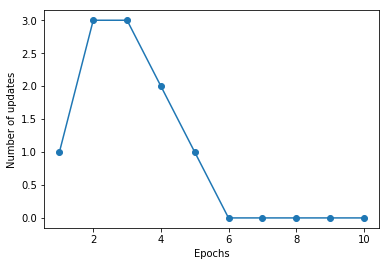

In [4]:
# Only the specified argument will be change or they will be keep default
ppn = Perceptron(lr = 0.1, n_iter = 10)
ppn.fit(X, y)
# Python won't take acount the end value, so we use range(1, 11)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, step = 0.02):
    '''setup'''
    # Define the order possible used markers and colors. There would be error if we had more categories than pre-set. 
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # Define the number of colors
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # To scale all data points in center of the plot
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    ## xx1, xx2 in shape of (305, 235): len(2nd argument) as row num, len(1st argument) as col num
    ## 1st list: repeat 1st argument for len(2nd argument) rows
    ## 2nd list: repeat every elements in 2nd argument len(1st argument) times for len(2nd argument) rows
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step = step), 
                           np.arange(x2_min, x2_max, step = step))
    
    # Return the flat vector (1 * n)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    #fill the color by border given by stepped array xx1 and xx2
    plt.contourf(xx1, xx2, Z, alpha = 0.1, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot sample with label 1 and label -1 separately
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], 
                    y = X[y == cl, 1], 
                    alpha = 0.8, 
                    c = colors[idx], 
                    marker = markers[idx], label = cl, 
                    edgecolor = 'black')

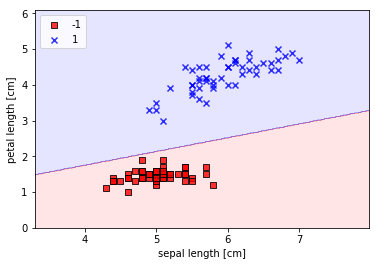

In [6]:
# Implement defined function
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

Note: The Proceptron can only do the classification on linear separatable data set.
The definition of linear separatable is well define by Wikipedia: https://en.wikipedia.org/wiki/Linear_separability

## Adaline with GD

In [7]:
class AdalineGD(object):
    """ADAptive Linear NEuron classifier
    
    Parameters
    -----------
    eta: float
        Learing rate(0.0, 1.0)
    n_iter: int
        Passes over the training dataset 
    random_state: int
        Random number generator seed for randomly get initial weights
    
    Attributes
    -----------
    w_: 1d-array
        Weights after fitting
    cost_: list
        SSE cost function of each epoch
    
    """
    
    def __init__(self, lr = 0.01, n_iter = 50, random_state = 1):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        -----------
        X: array-like, shape = (n_samples, m_features)
        y: array-like, shape = n_samples, target values
        
        Notes
        ------
        The Adaline computes the errors by the true label and activation function output value, instead of
        predicted labels in Perceptron.
        
        Return
        -------
        self: object
        
        """
        self.w_ = np.random.RandomState(self.random_state).normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.lr * np.dot(X.T, errors)
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
            
    def net_input(self, X):
        
        return np.dot(X, self.w_)
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    

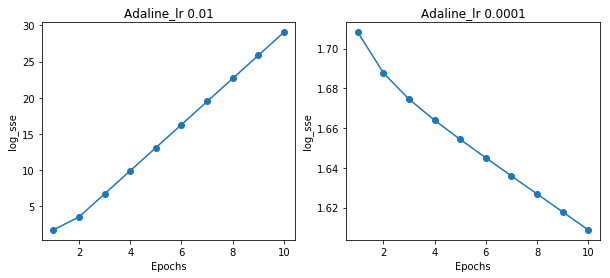

In [8]:
X_new = np.vstack([np.ones((X.shape[0],)), X.T]).T

## The selection of learning rates matters. Since too large will skip the true valley every time and cannot converge.
## The too small learning rates will be time consuming to find global valley.

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ada1 = AdalineGD(n_iter = 10, lr = 0.01,).fit(X_new, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log_sse')
ax[0].set_title('Adaline_lr 0.01')

ada2 = AdalineGD(n_iter = 10, lr = 0.0001,).fit(X_new, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log_sse')
ax[1].set_title('Adaline_lr 0.0001')
plt.show()

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions2(X, y, classifier, step = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # Define the number of colors
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # To scale all data points in center of the plot
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    ## xx1, xx2 in shape of (305, 235): len(2nd argument) as row num, len(1st argument) as col num
    ## 1st list: repeat 1st argument for len(2nd argument) rows
    ## 2nd list: repeat every elements in 2nd argument len(1st argument) times for len(2nd argument) rows
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step = step), 
                           np.arange(x2_min, x2_max, step = step))
    
    # Return the flat vector (1 * n)
    Z = classifier.predict(np.array([np.ones((xx1.ravel().shape[0],)), xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    #fill the color by border given by stepped array xx1 and xx2
    plt.contourf(xx1, xx2, Z, alpha = 0.1, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot sample with label 1 and label -1 separately
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], 
                    y = X[y == cl, 1], 
                    alpha = 0.8, 
                    c = colors[idx], 
                    marker = markers[idx], label = cl, 
                    edgecolor = 'black')

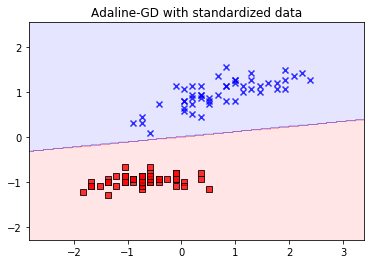

In [10]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std_new = np.vstack([np.ones((X_std.shape[0],)), X_std.T]).T
ada = AdalineGD(n_iter = 15, lr = 0.01)
ada.fit(X_std_new, y)

plot_decision_regions2(X_std, y, classifier = ada)
plt.title('Adaline-GD with standardized data')
plt.show()

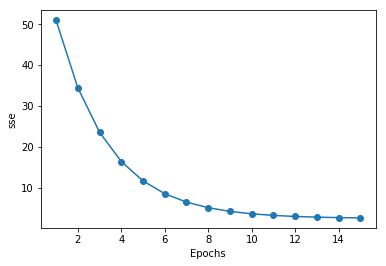

In [11]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('sse')
plt.show()

## Adaline with SGD

In [12]:
class AdalineSGD(object):
    """
    
    Parameters
    -----------
    
    Attributes
    -----------
    
    
    """
    
    def __init__(self, lr = 0.01, n_iter = 10, random_state = None, shuffle = True):
        self.lr = lr
        self.shuffle = shuffle
        self.random_state = random_state
        self.n_iter = n_iter
        self.w_initialized = False
        
    def fit(self, X, y):
        """
        Parameters
        -----------
        
        Notes:
        Stochastic Gradient Descent are designed to solve the time cost of Gradient Descent in large scale training 
        set which compute the whole training set points to get the error and update weights.
        Stochastic Gradient Descent compute use single point to represent whole training set to update weights, thus 
        makes computation cost lower.
        
        Returns
        --------
        self: object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, label in zip(X, y):
                cost.append(self._update_weights(xi, label))
            avg_cost = sum(cost) / len(cost)
            self.cost_.append(avg_cost)
        return self
        
    def _initialize_weights(self, m):
        self.w_ = np.random.RandomState(self.random_state).normal(loc = 0.0, scale = 0.01, size = m)
        self.w_initialized = True
    
    def _shuffle(self, X, y):
        r = np.random.RandomState(self.random_state).permutation(len(y))
        return X[r], y[r]
    
    #def partial_fit(self, X, y):
    #    if not self.w_initialized:
    #        self._initialize_weights(X.shape[1])
    #    self._update_weights(X, y)
    #    return self
    
    def _update_weights(self, xi, label):
        output = self.activation(self.net_input(xi))
        error = (label - output)
        self.w_ += self.lr * np.dot(xi, error)
        cost = 0.5 * error ** 2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_)
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0, 1, -1)

In [13]:
ada_sgd = AdalineSGD(n_iter = 15, lr = 0.01, random_state = 1)
ada_sgd.fit(X_std_new, y)

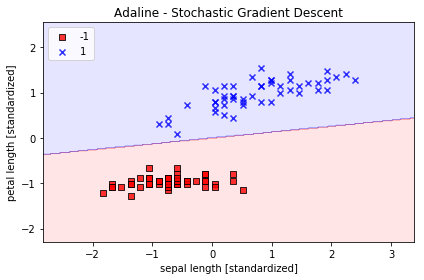

In [14]:
plot_decision_regions2(X_std, y, classifier = ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

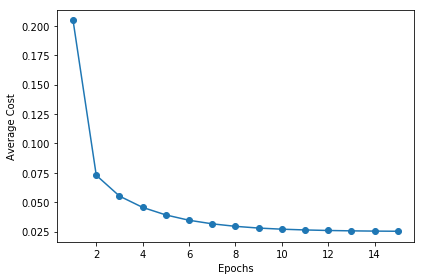

In [15]:
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()